In [ ]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Flatten
#from keras.layers import SimpleRNN,LSTM
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
#np.sin(x)

In [ ]:
#X = [[[(i*j +j)/500] for i in range(5)] for j in range(100)]
#Y = [(i*6)/500 for i in range(100)]

In [ ]:
#X = [[[(i*j +j)] for i in range(5)] for j in range(100)]
#Y = [(i*6) for i in range(100)]
#X_data = [np.sin(i) for i in range(100)]
#X = [[[np.sin(i+j)] for j in range(5)] for i in range(94)]
#Y = [np.sin(i+6) for i in range(94)]

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten

# Generate sine values
X_data = [np.sin(i) for i in range(1000)]

# Prepare the dataset
X, Y = [], []
for i in range(994):
    X.append([[X_data[i + j]] for j in range(5)])
    Y.append(X_data[i + 6])

# Optional: Display a few samples from the dataset
for i in range(5):
    print("Input:", X[i], "Predicted Output:", Y[i])


In [ ]:
#  for i in range(94):
#    print(X[i],Y[i])

In [ ]:
#X[0]
Y[0]

-0.2794154981989259

In [ ]:
X = np.array(X, dtype="float32")
Y = np.array(Y, dtype="float32")

In [ ]:
X /= 500
Y/= 500

In [ ]:
X.shape

(994, 5, 1)

In [ ]:
Y.shape

(994,)

In [ ]:
Y

array([-5.5883097e-04,  1.3139732e-03,  1.9787166e-03,  8.2423701e-04,
       -1.0880423e-03, -1.9999805e-03, -1.0731459e-03,  8.4033405e-04,
        1.9812149e-03,  1.3005757e-03, -5.7580660e-04, -1.9227950e-03,
       -1.5019744e-03,  2.9975441e-04,  1.8258905e-03,  1.6733112e-03,
       -1.7702620e-05, -1.6924408e-03, -1.8111567e-03, -2.6470350e-04,
        1.5251170e-03,  1.9127519e-03,  5.4181158e-04, -1.3272677e-03,
       -1.9760632e-03, -8.0807530e-04,  1.1028534e-03,  1.9998236e-03,
        1.0581654e-03, -8.5636531e-04, -1.9835576e-03, -1.2870763e-03,
        5.9273711e-04,  1.9275907e-03,  1.4902262e-03, -3.1724534e-04,
       -1.8330431e-03, -1.6635496e-03,  3.5403853e-05,  1.7018070e-03,
        1.8035767e-03,  2.4714624e-04, -1.5365093e-03, -1.9075053e-03,
       -5.2474969e-04,  1.3404584e-03,  1.9732551e-03,  7.9185033e-04,
       -1.1175781e-03, -1.9995102e-03, -1.0431020e-03,  8.7232952e-04,
        1.9857453e-03,  1.2734761e-03, -6.0962123e-04, -1.9322356e-03,
      

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)
                                                    #random_state=5)

In [ ]:
X_train

In [ ]:
from keras.layers import SimpleRNN
model = Sequential()
model.add(SimpleRNN(2,input_shape=(5,1), return_sequences=True))
model.add(Flatten())
model.add(Dense(1, activation='tanh'))
model.compile(optimizer='adam',loss='mae', metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 5, 2)              8         
                                                                 
 flatten_1 (Flatten)         (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 19 (76.00 Byte)
Trainable params: 19 (76.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
hist = model.fit(X_train, y_train, epochs=1000, batch_size=64, validation_data=(X_test, y_test))

In [ ]:
y_predict = model.predict(X_test)

7/7 [==============================] - 0s 3ms/step


In [ ]:
y_predict

In [ ]:
y_test

In [ ]:
#y_train

In [ ]:
#y_predict = model.predict(X_test)

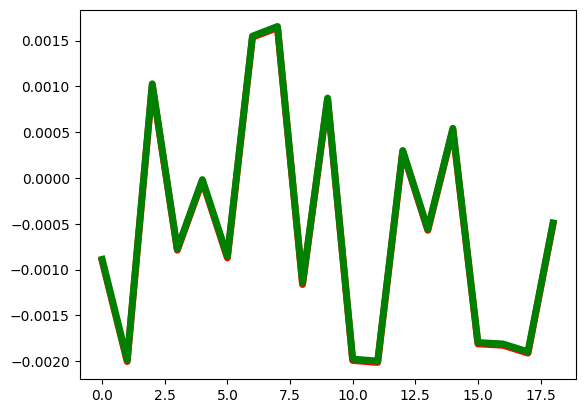

In [ ]:
plt.plot(range(19),  y_predict, lw=5,c='r')
plt.plot(range(19),  y_test, lw=5, c='g')
plt.show()

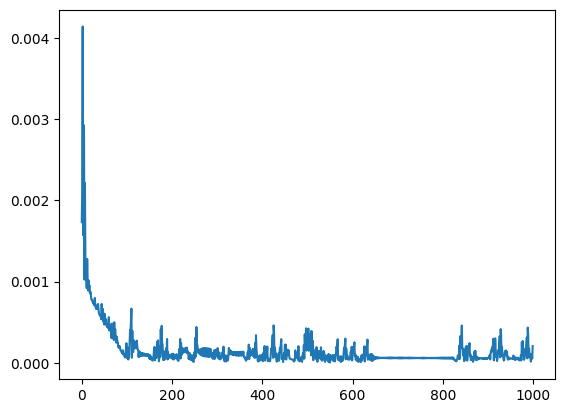

In [ ]:
plt.plot(hist.history['loss'])
plt.show()